In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df = pd.read_csv('/content/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df['overall score'] = np.round((df['math score'] + df['writing score'] + df['reading score']) / 3, 2)

In [5]:
df.sample(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,overall score
446,male,group D,some college,free/reduced,none,69,66,60,65.00
557,male,group C,master's degree,free/reduced,none,61,67,66,64.67
283,female,group D,some college,free/reduced,completed,70,78,78,75.33
464,male,group A,bachelor's degree,standard,completed,75,58,62,65.00
320,female,group C,high school,free/reduced,completed,67,79,84,76.67


In [6]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
overall score                  0
dtype: int64

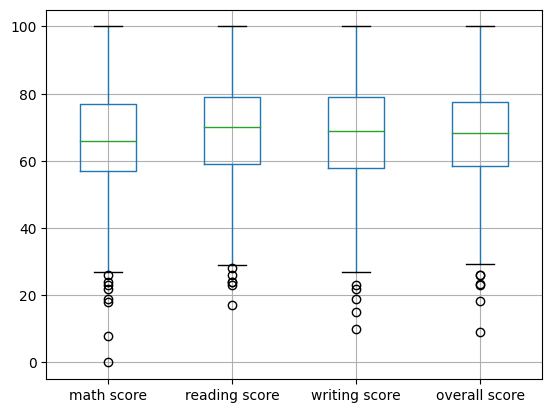

In [7]:
df[['math score', 'reading score', 'writing score', 'overall score']].boxplot()
plt.show()

In [24]:
df[['math score', 'reading score', 'writing score', 'overall score']].describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.08900,15.163080,0.0,57.00,66.00,77.00,100.0
reading score,1000.0,69.16900,14.600192,17.0,59.00,70.00,79.00,100.0
writing score,1000.0,68.05400,15.195657,10.0,57.75,69.00,79.00,100.0
overall score,1000.0,67.77058,14.257311,9.0,58.33,68.33,77.67,100.0


In [9]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [10]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [11]:
encoder = OneHotEncoder(
    categories='auto',
    drop='first',
    handle_unknown='error',
    sparse_output=False,

)

In [12]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score', 'overall score'],
      dtype='object')

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(['overall score'], axis = 1), df['overall score'], test_size = 0.3, random_state = 15)

In [14]:
ct = ColumnTransformer(
    [('encoding',
      encoder,
       ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
       )
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
)

ct.set_output(transform = 'pandas')

ColumnTransformer(remainder='passthrough',
                  transformers=[('encoding',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 ['gender', 'race/ethnicity',
                                  'parental level of education', 'lunch',
                                  'test preparation course'])],
                  verbose_feature_names_out=False)

In [15]:
X_train = ct.fit_transform(X_train)
X_test = ct.fit_transform(X_test)

# Linear Regression Model Assumptions
I want to implement a linear regression model for this problem. We have to check whether the linear model assumptions are met within our dataset

#1. Linearity Check

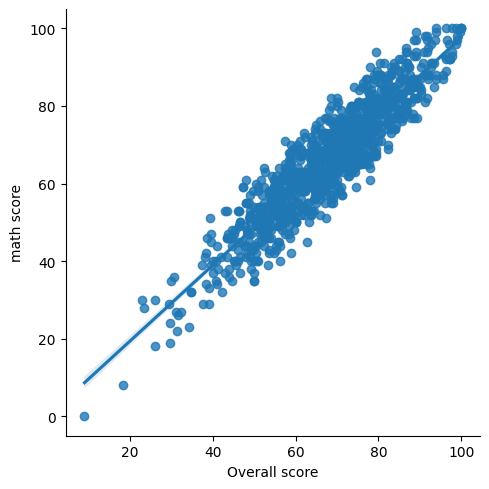

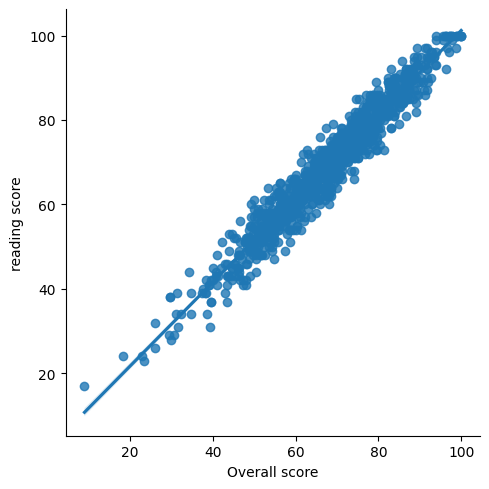

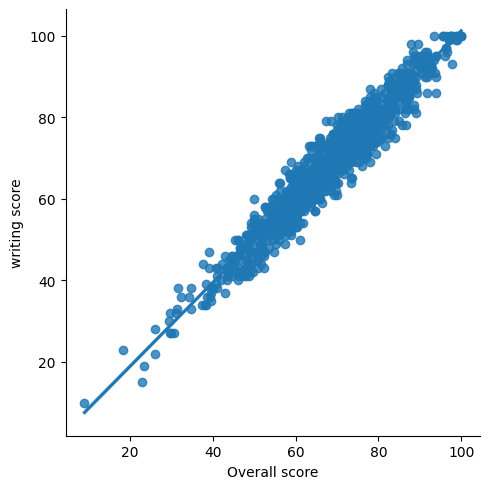

In [16]:
for cols in df.select_dtypes(include=np.number).columns[:-1]:
  sns.lmplot(x = 'overall score', y = cols, data = df)
  plt.xlabel('Overall score')
  plt.ylabel(cols)
plt.show()


This concludes the linearity check, all the numerical features have a **linear relationship** with the target variable

#2. No Perfect Multicollinearity
This assumptions states that there should be **no perfect linear relationship** between two or more predictors.

We can easily check this assumpution by using a heatmap

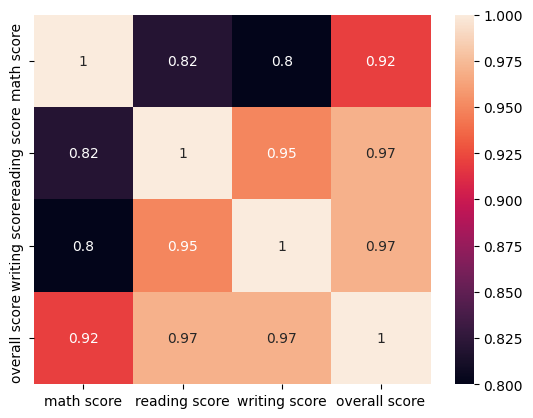

In [17]:
corr_matrix = df.select_dtypes(include=np.number).corr().round(2)
sns.heatmap(data = corr_matrix, annot = True)
plt.show()

There is a strong relationship between the variables but not a perfect one, this checks out the No Perfect Multicollinearty check

#3 & 4. Normally Distruibted Errors & Homoscedasticity

To test the Normally Distrubited errors the residuals are random and must be normally distrubited with a $μ=5$

To test the Homoscedasticity, the variance of the residual terms should be constant.

We can use the YellowBrick library to analysis both of these assumptions.

In [18]:
from yellowbrick.regressor import ResidualsPlot

In [19]:
model = LinearRegression()

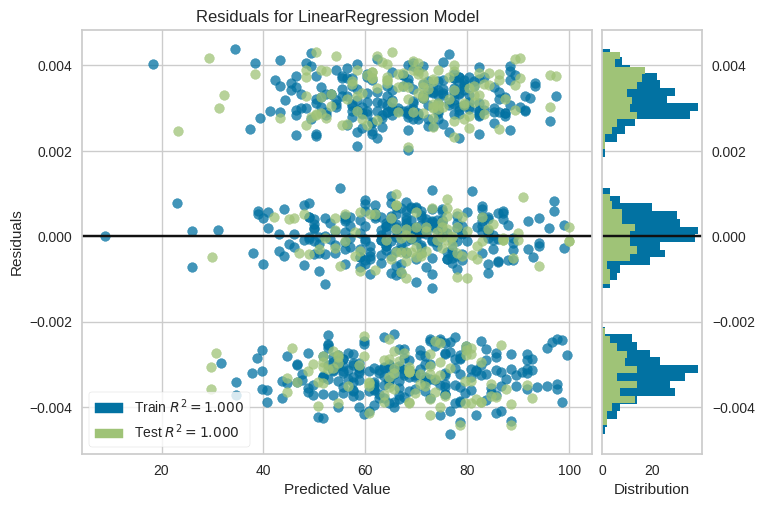

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [20]:
visual = ResidualsPlot(model)
visual.fit(X_train, y_train)
visual.score(X_test, y_test)
visual.poof()

On the left graph, we can see that there is no pattern for the scatterd plots, this implies that there is homoscedasticy

On the right graph, we can see that the errors are normally distrubited with the mean = 0.

### End of Linear Model Assumptions
This concludes the main assumptions that we should take care of when creating a linear model

In [21]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [22]:
# Make predictions on both training and testing data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

r_squared_train = r2_score(y_train, y_train_pred)
r_squared_test = r2_score(y_test, y_test_pred)

In [23]:
print(f"Training R2: {r_squared_train}")
print(f"Testing R2: {r_squared_test}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")

Training R2: 0.9999999664099908
Testing R2: 0.999999958846745
MAE: 0.0024388484758772816
MSE: 7.989813429309455e-06
RMSE: 0.0028266258028450558


### We have a very high score of accuracy on both the training and test set and a low one on the error metrics, The linear regression model was a good choice for this dataset